In [1]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(101)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", palette="rainbow")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)
# Loading built-in Tips dataset:
titanic = sns.load_dataset("titanic")

# Pre-viewing Dataset:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='class', ylabel='fare'>

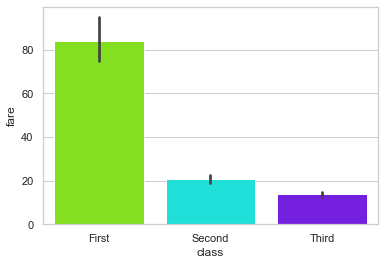

In [2]:
# Plotting basic Violin Plot:
sns.barplot(x="class", y="fare", data=titanic, palette="hsv")

<AxesSubplot:xlabel='class', ylabel='count'>

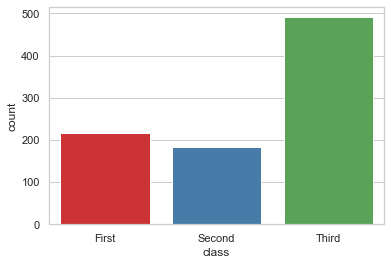

In [3]:
sns.countplot(x='class', data=titanic, palette="Set1")

<AxesSubplot:xlabel='count', ylabel='class'>

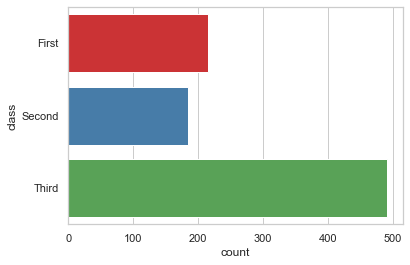

In [4]:
sns.countplot(y='class', data=titanic, palette="Set1")

<AxesSubplot:xlabel='class', ylabel='fare'>

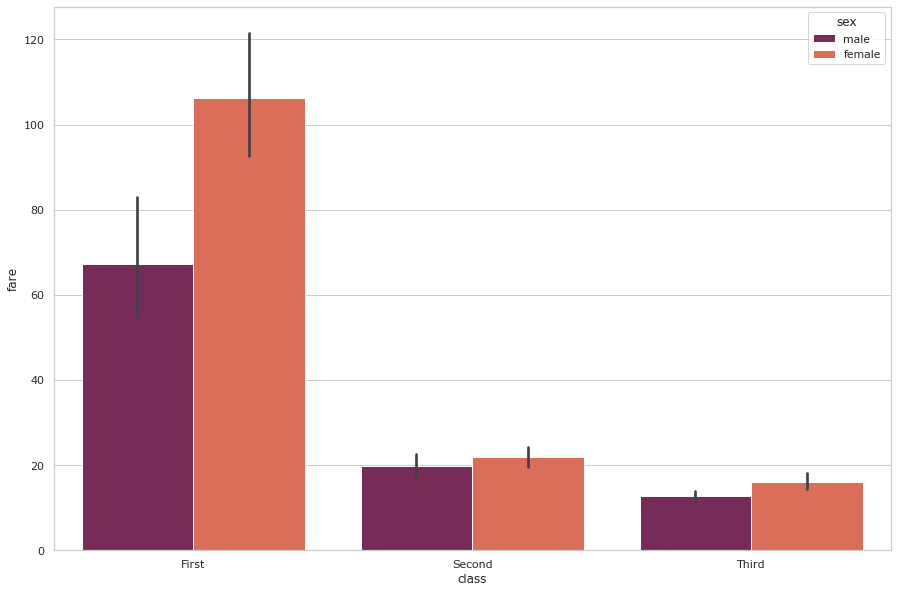

In [5]:
# Using Matplotlib to set figure size and Font style for our plot:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['font.family'] = "Verdana"

# Plotting a set of vertical bars with nested grouping by two variables:
sns.barplot(x="class", y="fare", hue="sex", data=titanic, palette="rocket")

<AxesSubplot:xlabel='embark_town', ylabel='age'>

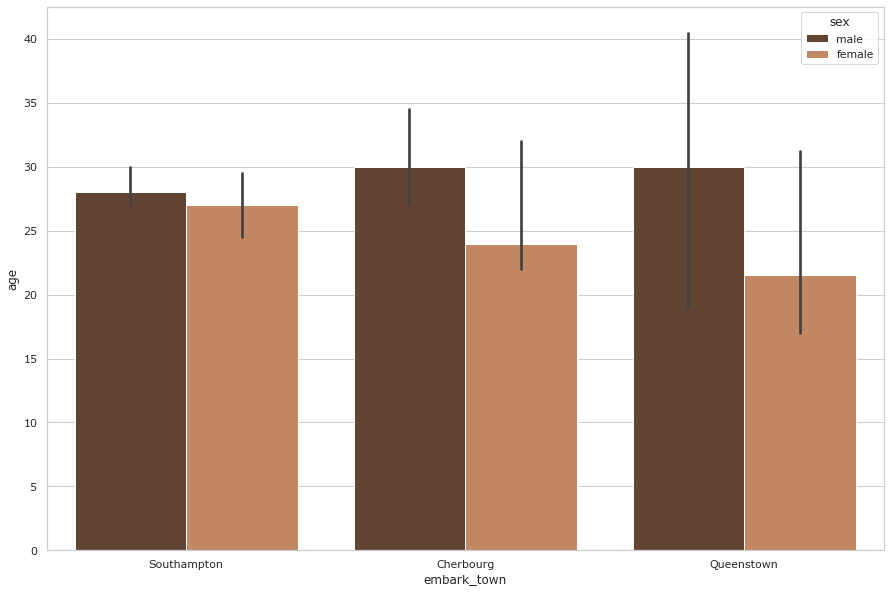

In [6]:
sns.barplot(x="embark_town", y="age", data=titanic, hue="sex", palette="copper", estimator=np.median)

<AxesSubplot:xlabel='embark_town', ylabel='age'>

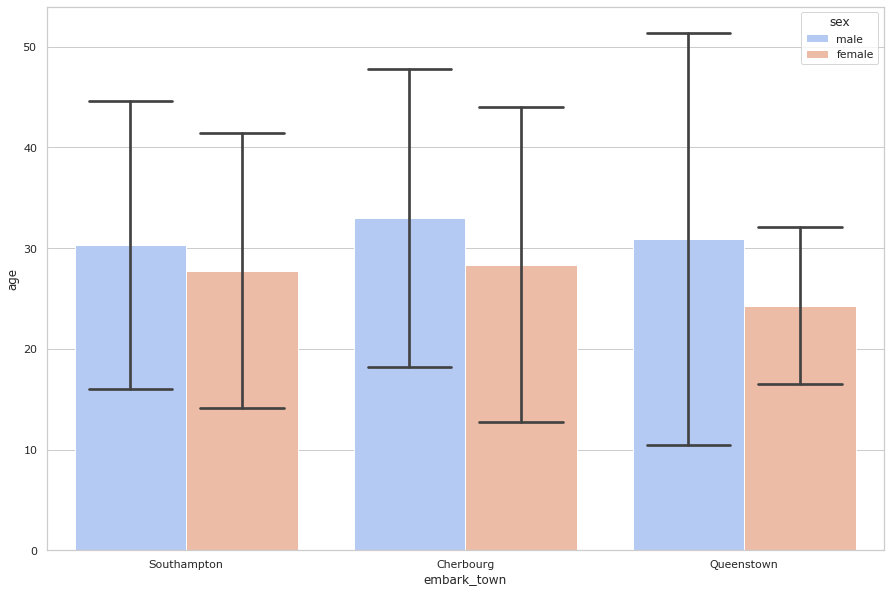

In [8]:
sns.barplot(x="embark_town", y="age", data=titanic, hue="sex", palette="coolwarm", ci="sd", capsize=0.3)

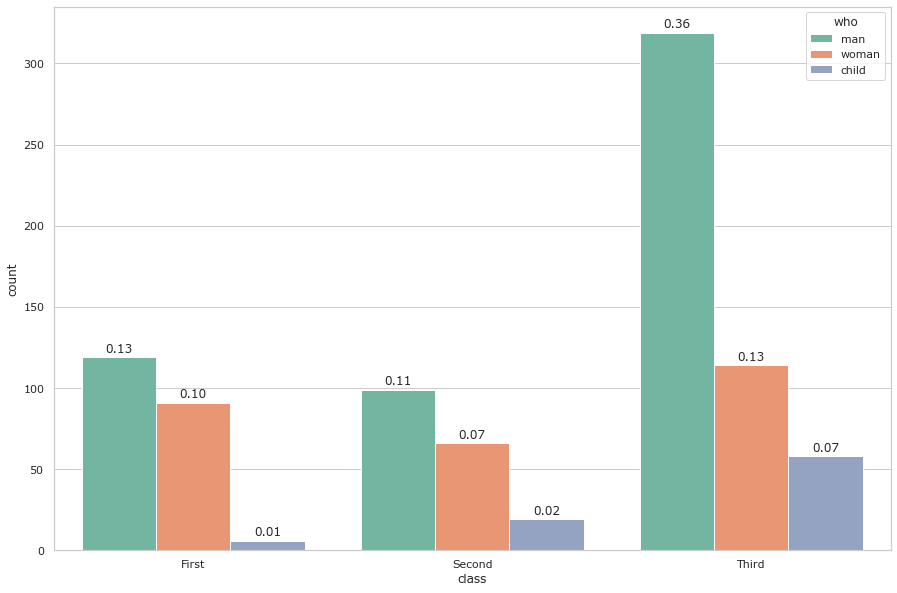

In [9]:
# Taking into account total available values (Setting one person per row):
total = float(len(titanic))

# Plotting our figure (keeping it simple):
ax = sns.countplot(x="class", hue="who", data=titanic, palette="Set2")

# Looping over entire Titanic dataset:
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha="center")


<AxesSubplot:xlabel='class', ylabel='fare'>

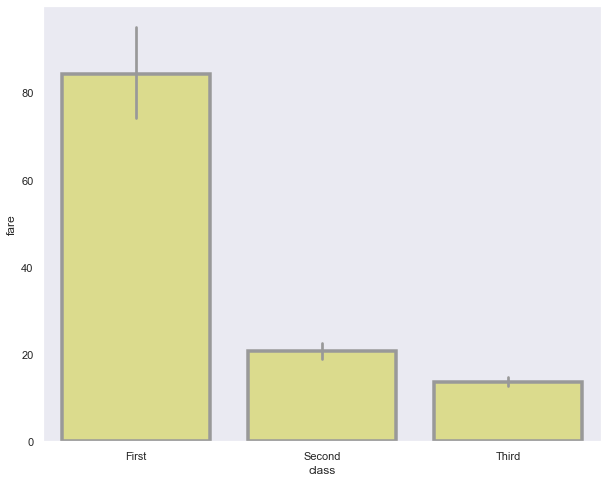

In [10]:
# Few more modifications in Appearance:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.set_style("dark")
sns.barplot(x="class", y="fare", data=titanic, lw=3.5, facecolor=tableau_20[17], errcolor=".6", edgecolor=".6")

In [21]:
# Loading 'Score Book' Dataset using Pandas:
scorebook = pd.read_csv("score_book.csv")

# Pre-viewing Dataset:
scorebook.head(10)

,Student ID,Analysis,Machine Learning,Artificial Intelligence
0,1,2.393413,3.324129,0.039631
1,2,3.228434,3.109299,5.621415
2,3,6.611172,3.603704,4.830770
3,4,4.553519,5.030114,4.846976
4,5,4.151165,6.555816,4.126257
5,6,9.077036,7.478125,3.321004
6,7,7.039631,8.201300,2.667565
7,8,3.021069,8.306264,1.976073
8,9,5.011523,6.622167,1.220087
9,10,2.006191,4.272699,0.656404


In [29]:
scorebook = scorebook.rename(columns={"Machine Learning":"Machine_Learning","Artificial Intelligence":"Artificial_Intelligence","Student ID": "Student_ID"})

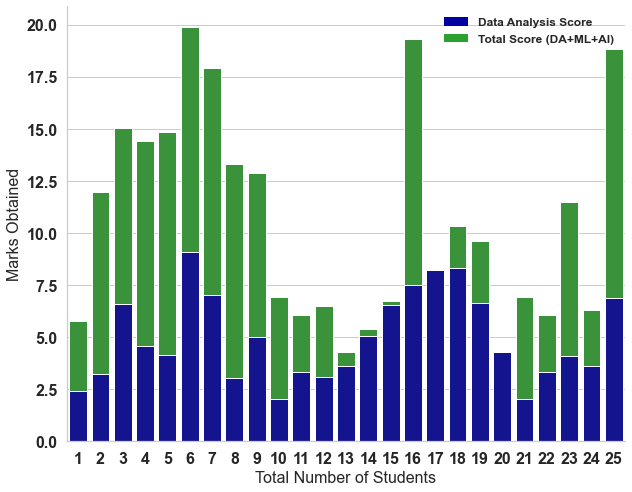

In [30]:
# Importing Dependancy:
import matplotlib as mpl

# Creating a 'Total' column to contain Total marks obtained by each student:
scorebook["Total"] = scorebook.Analysis + scorebook.Machine_Learning + scorebook.Artificial_Intelligence

# Plot 1: 'Total' marks obtained (Placing on Top as Background):
sns.barplot(x = scorebook.Student_ID, y = scorebook.Total, color = tableau_20[4])

# Plot 2: 'Data Analysis' result (Overlaying at Bottom):
bottom_plot = sns.barplot(x = scorebook.Student_ID, y = scorebook.Analysis, color = '#0000A3')

# Deciding Aesthetics (Look into Matplotlib for customization):
topbar = plt.Rectangle((0,0), 1, 1, fc= tableau_20[4], edgecolor = "None")
bottombar = plt.Rectangle((0,0),0,0, fc= '#0000A3', edgecolor = "None")
l = plt.legend([bottombar, topbar], ["Data Analysis Score", "Total Score (DA+ML+AI)"], loc=1, ncol=1, prop={'size':12})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine()
bottom_plot.set_ylabel("Marks Obtained")
bottom_plot.set_xlabel("Total Number of Students")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)



Text(0.5, 0, 'Student Enrollment ID')

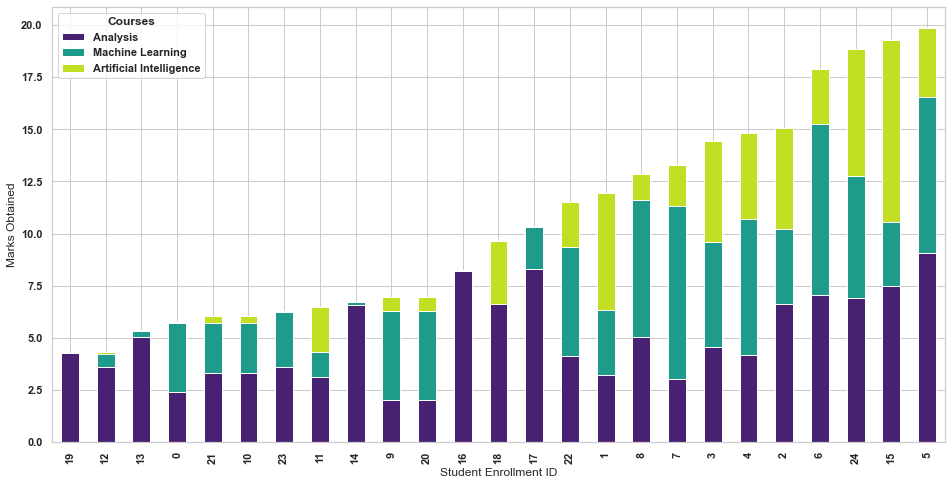

In [33]:
# To make a colormap from a list of Colors:
from matplotlib.colors import ListedColormap
sns.set_style("whitegrid")

scorecard = pd.read_csv("score_book.csv")
scorecard = (scorecard.T)[1:].reset_index()
scorecard.rename(index=str, columns={'index': 'Courses'}, inplace=True)

ax = scorecard.set_index('Courses').reindex(scorecard.set_index('Courses').sum().sort_values().index, axis=1).T.plot(kind='bar', stacked=True,
          colormap = ListedColormap(sns.color_palette("viridis", 10)), 
          figsize = (16,8))

plt.rcParams['font.family'] = "serif"
ax.set_ylabel("Marks Obtained")
ax.set_xlabel("Student Enrollment ID")

<AxesSubplot:xlabel='sex', ylabel='survived'>

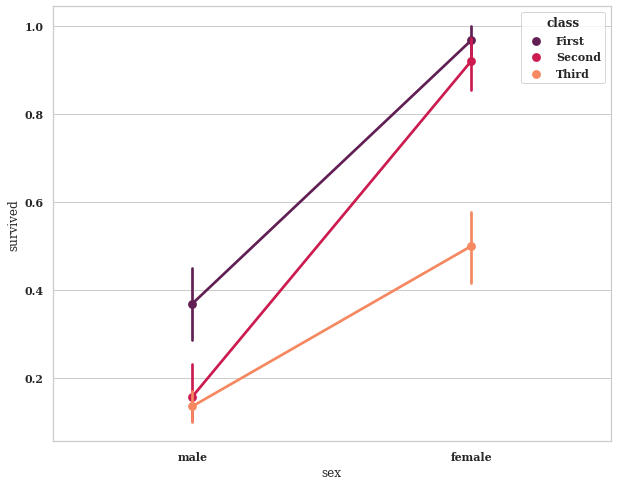

In [34]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic, palette="rocket")

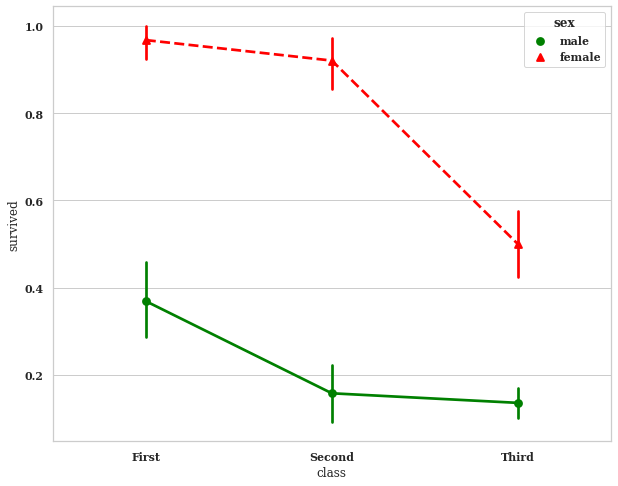

In [35]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic, palette={"male": "g", "female": "r"},
              markers=["o", "^"], linestyles=["-", "--"]);

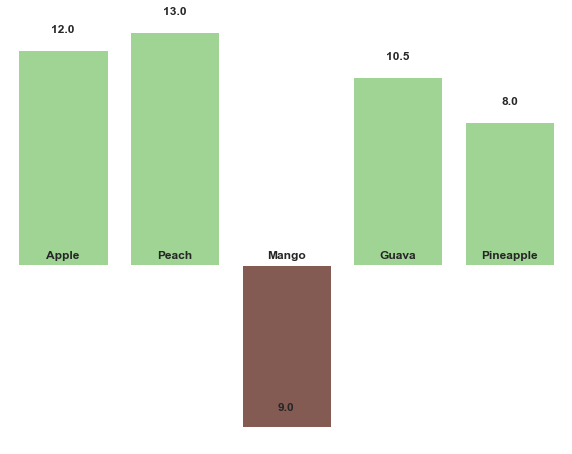

In [36]:
# Creating random data:
x = ['Apple', 'Peach', 'Mango', 'Guava', 'Pineapple']
y = [12, 13, -9, 10.5, 8]

# Background Styling:
sns.axes_style('white')
sns.set_style('whitegrid')

# Declaring colors and directing Bar Plot:
colors = [tableau_20[5] if _y >=0 else tableau_20[10] for _y in y]
ax = sns.barplot(x, y, palette=colors)

for n, (label, _y) in enumerate(zip(x, y)):
    ax.annotate(s='{:.1f}'.format(abs(_y)), xy=(n, _y), ha='center', va='center', xytext=(0,20), 
                textcoords='offset points', weight='bold')

    ax.annotate(s=label, xy=(n, 0), ha='center', va='center', xytext=(0,10), textcoords='offset points')

# Axes formatting:
ax.set_yticks([])
ax.set_xticks([])
sns.despine(ax=ax, bottom=True, left=True)

Text(0, 0.5, 'Values')

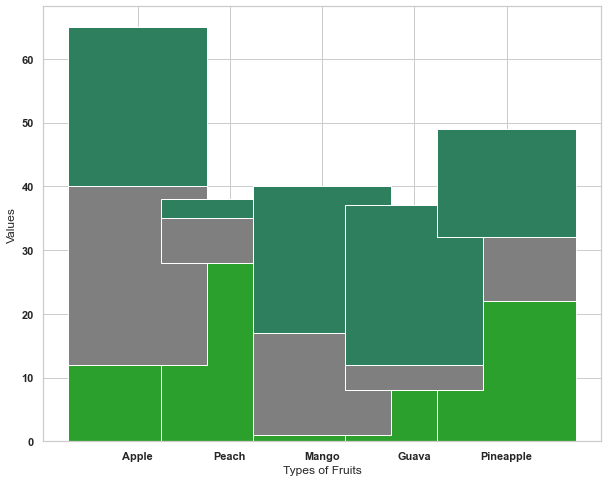

In [37]:
# Importing Dependency:
from matplotlib import rc

# Ensuring bold Y-axis:
rc('font', weight='bold')
 
# Values for each group:
bar1 = [12, 28, 1, 8, 22]
bar2 = [28, 7, 16, 4, 10]
bar3 = [25, 3, 23, 25, 17]
 
# Height of bar1 + bar2:
bars = [40, 35, 17, 12, 32]
 
# Position of bars on X-axis:
pos = [0,1,2,3,4]
 
# Group Name:
fruits = ['Apple','Peach','Mango','Guava','Pineapple']
 
# Create bottom bars:
plt.bar(pos, bar1, color=tableau_20[4], edgecolor='white', width=1.5)
# Create middle bars on top of the first one:
plt.bar(pos, bar2, bottom=bar1, color=tableau_20[14], edgecolor='white', width=1.5)
# Create Top bars:
plt.bar(pos, bar3, bottom=bars, color='#2d7f5e', edgecolor='white', width=1.5)
 
# Custom X axis:
plt.xticks(pos, fruits, fontweight='bold')
plt.xlabel("Types of Fruits")
plt.ylabel("Values")

# Factor Plots

In [3]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", palette="hsv")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

In [4]:
# Loading Built-in Dataset:
exercise = sns.load_dataset("exercise")

# Pre-viewing Dataset:
exercise.head(10)
#exercise.columns

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


Creating a basic Factor Plot:


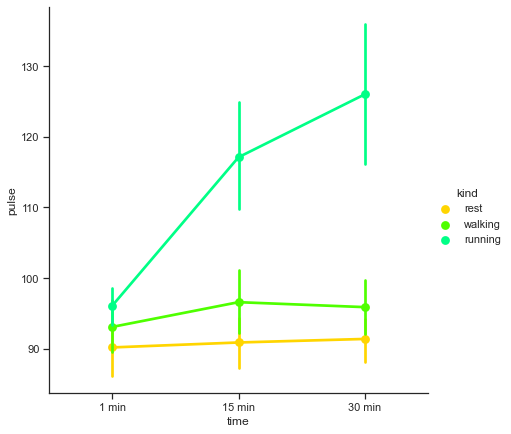

In [5]:
sns.factorplot(x="time", y="pulse", hue="kind", data=exercise, size=6)

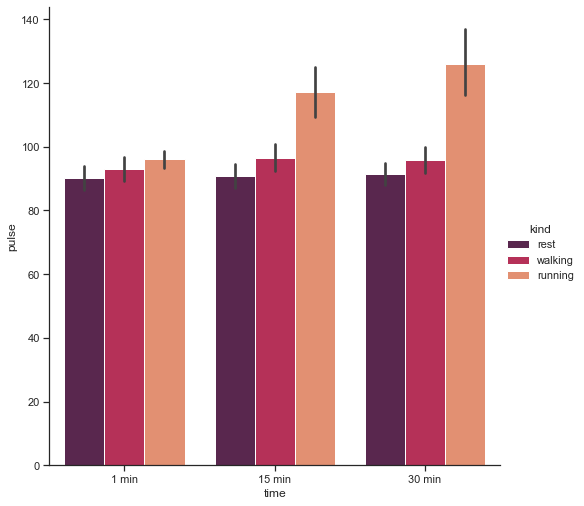

In [6]:
sns.factorplot(x="time", y="pulse", hue="kind", data=exercise, size=7, kind="bar", palette="rocket")

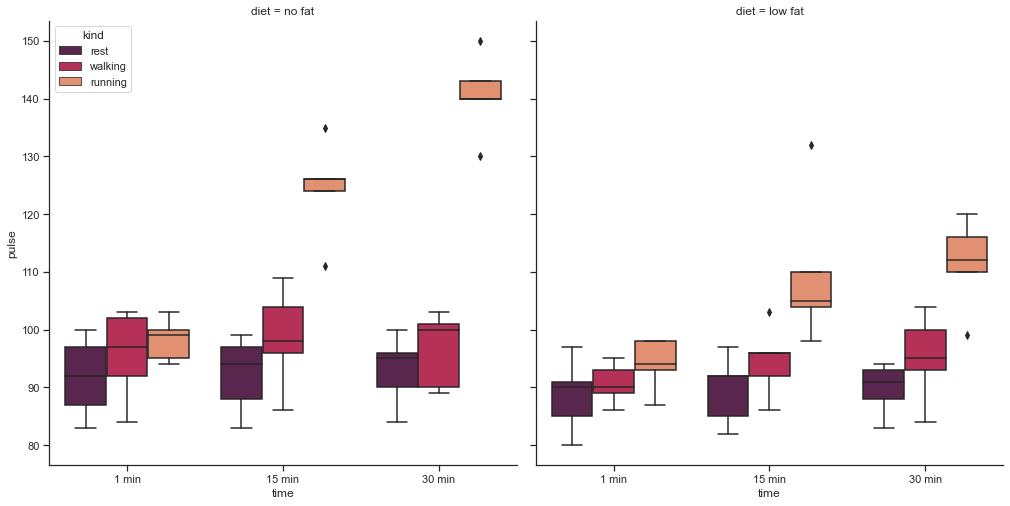

In [7]:
# For a change, here we shall use a "Box Plot", instead of a "Bar Plot" to visualize the difference:
# Let us pull our Legend inside the plot:
sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, size=7, kind="box", palette="rocket", legend_out=False)

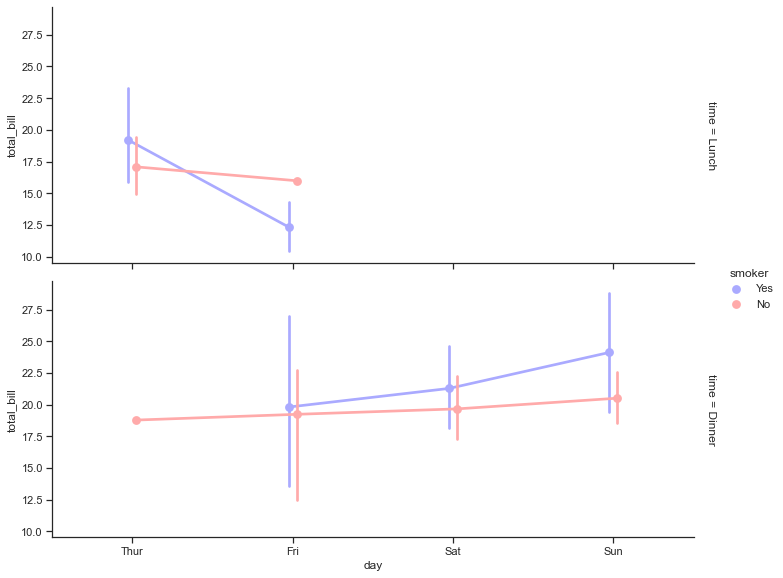

In [9]:
# Loading Built-in Tips Dataset:
tips = sns.load_dataset("tips")

# Let us get all the facets of our grid vertically stacked this time:
sns.factorplot(x="day", y="total_bill", hue="smoker", row="time", data=tips, 
               orient="v", size=4, aspect=2.5, palette="bwr", kind="point", dodge=True, cut=0, bw=.2, margin_titles=True)

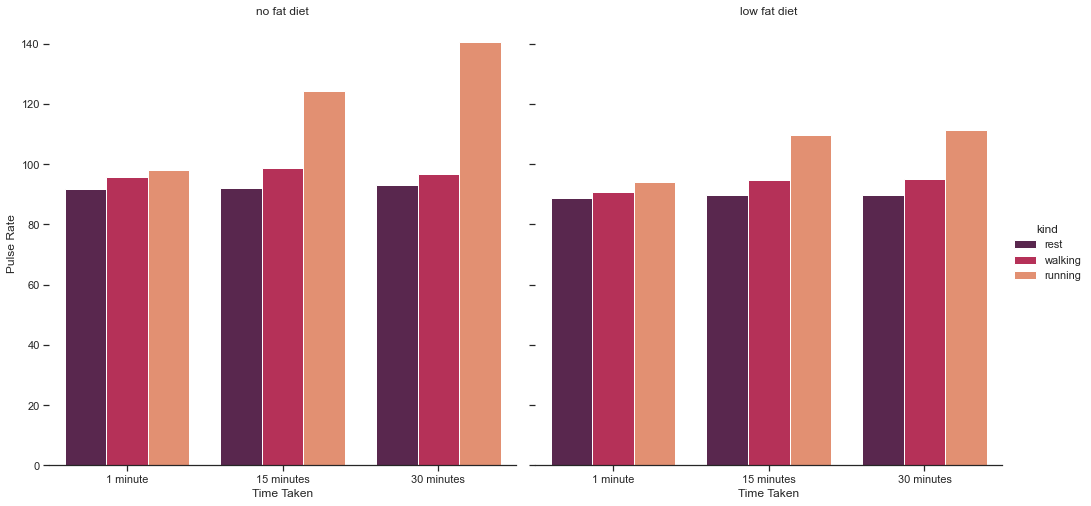

In [10]:
# Let us also assign a variable "ax" to it:
ax = sns.factorplot(x="time", y="pulse", hue="kind", col="diet", data=exercise, size=7, kind="bar", 
                    palette="rocket", ci=None)

# Let us now customize it by using methods on our FacetGrid:
ax.set_axis_labels("Time Taken", "Pulse Rate")
ax.set_xticklabels(["1 minute", "15 minutes", "30 minutes"])
ax.set_titles("{col_name} {col_var}")
ax.despine(left=True)